<a href="https://colab.research.google.com/github/AIML25/AIML_2025_B15/blob/main/2303a510f4_02_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

Top 5 Reasons for Absenteeism:
 Reason for absence
13    842
19    729
23    424
28    335
11    297
Name: Absenteeism time in hours, dtype: int64

Day of the Week with Most Absenteeism:
 Day of the week
2    1489
3    1229
4    1115
6     738
5     553
Name: Absenteeism time in hours, dtype: int64

Maximum Age: 58
Minimum Age: 27

Seasons with Most Absenteeism:
 Seasons
3    1492
1    1241
4    1239
2    1152
Name: Absenteeism time in hours, dtype: int64

Highest Educational Qualification (Encoded): 1

Classification Model Accuracy: 0.4864864864864865


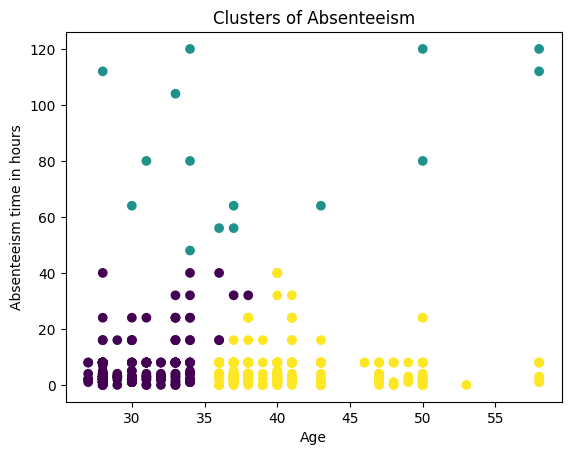

In [ ]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# fetch dataset
absenteeism_at_work = fetch_ucirepo(id=445)

# Access the data using absenteeism_at_work.data and store it in a DataFrame
data = pd.DataFrame(absenteeism_at_work.data.features)
data['Absenteeism time in hours'] = absenteeism_at_work.data.targets  # Add target variable to the DataFrame

# Step 1: Identify the top 5 reasons for absenteeism
top_reasons = data.groupby('Reason for absence')['Absenteeism time in hours'].sum().sort_values(ascending=False).head(5)
print("Top 5 Reasons for Absenteeism:\n", top_reasons)

# Step 2: Identify the day of the week with most absenteeism
day_with_most_absenteeism = data.groupby('Day of the week')['Absenteeism time in hours'].sum().sort_values(ascending=False)
print("\nDay of the Week with Most Absenteeism:\n", day_with_most_absenteeism)

# Step 3: Find the maximum and minimum age of employees
max_age = data['Age'].max()
min_age = data['Age'].min()
print("\nMaximum Age:", max_age)
print("Minimum Age:", min_age)

# Step 4: Name the seasons when absenteeism was most
season_absenteeism = data.groupby('Seasons')['Absenteeism time in hours'].sum().sort_values(ascending=False)
print("\nSeasons with Most Absenteeism:\n", season_absenteeism)

# Step 5: Identify the highest educational qualification
highest_education = data['Education'].value_counts().idxmax()
print("\nHighest Educational Qualification (Encoded):", highest_education)

# Step 6.1: Apply Classification Model
# Define features and target
X = data.drop(columns=['Absenteeism time in hours'])
y = data['Absenteeism time in hours']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("\nClassification Model Accuracy:", accuracy_score(y_test, y_pred))

# Step 6.2: Apply Clustering Model
# Select features for clustering
features = data[['Age', 'Absenteeism time in hours']]

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Visualize clusters
plt.scatter(data['Age'], data['Absenteeism time in hours'], c=data['Cluster'])
plt.xlabel('Age')
plt.ylabel('Absenteeism time in hours')
plt.title('Clusters of Absenteeism')
plt.show()